## Question: 2 Salary_hike -> Build a prediction model for Salary_hike

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# import dataset
Salary=pd.read_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\4-Linear Regression\salary_data.csv")
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualisation

In [4]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\ammaurya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

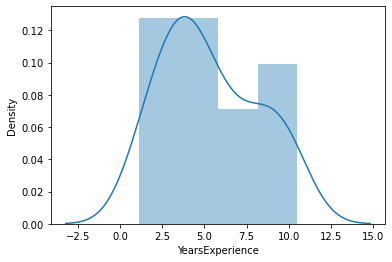

In [5]:
sns.distplot(Salary['YearsExperience'])

C:\Users\ammaurya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

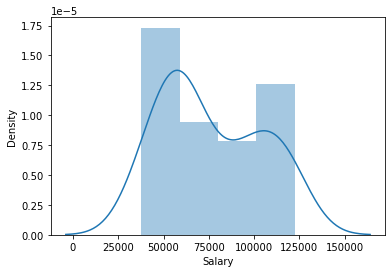

In [6]:
sns.distplot(Salary['Salary'])

## Feature Engineering

In [7]:
data=Salary.rename({'YearsExperience':'yrs_experience', 'Salary':'salary'},axis=1)
data

,yrs_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Correlation Analysis

In [8]:
data.corr()

,yrs_experience,salary
yrs_experience,1.000000,0.978242
salary,0.978242,1.000000


## Model Building

In [9]:
model=smf.ols("yrs_experience~salary",data=data).fit()

In [11]:
## Model Testing
model.params

Intercept   -2.383161
salary       0.000101
dtype: float64

In [12]:
## Checking p & t value
model.tvalues , model.pvalues

(Intercept    -7.281283
 salary       24.950094
 dtype: float64,
 Intercept    6.300123e-08
 salary       1.143068e-20
 dtype: float64)

In [13]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [14]:
## Model at 95% Confidence interval
model.conf_int(0.05)

,0,1
Intercept,-3.053603,-1.712718
salary,0.000093,0.000110


In [15]:
## Value prediction using models
pred = model.predict(data)
pred

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

Text(0, 0.5, 'yrs_experience')

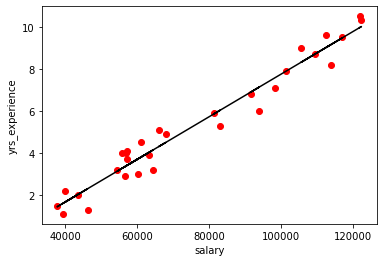

In [16]:
## Regression Visualization

plt.scatter(x=data['salary'],y=data['yrs_experience'],color='red');plt.plot(data['salary'],pred,color='black');plt.xlabel('salary');plt.ylabel('yrs_experience')

In [17]:
## we can see linear correlation between yrs of experience & salary hike
pred.corr(data.salary)

0.9999999999999999

In [19]:
# Transforming variables for accuracy with log
model2=smf.ols("salary~np.log(yrs_experience)",data=data).fit()

In [20]:
## Model 2 testing
model2.params

Intercept                 14927.97177
np.log(yrs_experience)    40581.98796
dtype: float64

In [21]:
# checking p & t value at model2
model2.tvalues , model2.pvalues

(Intercept                  2.895135
 np.log(yrs_experience)    12.791989
 dtype: float64,
 Intercept                 7.268813e-03
 np.log(yrs_experience)    3.250155e-13
 dtype: float64)

In [22]:
model2.rsquared , model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [23]:
# model2 testing 99% confidence interval
print(model2.conf_int(0.01))

                                   0             1
Intercept                 679.965646  29175.977894
np.log(yrs_experience)  31815.666558  49348.309362


In [25]:
## Prediction implying model2(Log)
pred2 = model2.predict(pd.DataFrame(data['yrs_experience']))
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [26]:
pred2.corr(data.salary)

0.9240610817882637

Text(0, 0.5, 'salary')

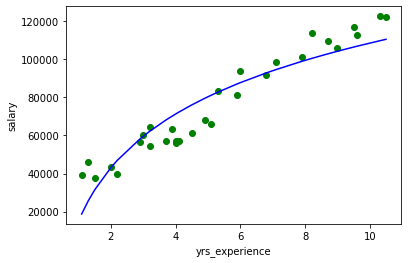

In [35]:
# Visualization of regression
import matplotlib.pylab as plt
plt.scatter(x=data['yrs_experience'],y=data['salary'],color='green');plt.plot(data['yrs_experience'],pred2,color='blue');plt.xlabel('yrs_experience');plt.ylabel('salary')

In [36]:
# Model#3 Exponential transformation
model3=smf.ols("np.log(yrs_experience)~salary",data=data).fit()

In [37]:
model3.params

Intercept   -0.094207
salary       0.000021
dtype: float64

In [38]:
model3.tvalues , model3.pvalues

(Intercept    -0.710225
 salary       12.791989
 dtype: float64,
 Intercept    4.834387e-01
 salary       3.250155e-13
 dtype: float64)

In [39]:
model3.rsquared , model3.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [40]:
# 99% confidence interval
print(model3.conf_int(0.01))

                  0         1
Intercept -0.460735  0.272322
salary     0.000016  0.000026


In [41]:
## Prediction using Log Method
pred_log = model3.predict(pd.DataFrame(data['salary']))
pred_log

0     0.733613
1     0.877997
2     0.699694
3     0.821607
4     0.745143
5     1.097602
6     1.171414
7     1.051375
8     1.261786
9     1.109112
10    1.235969
11    1.079760
12    1.104230
13    1.106839
14    1.191635
15    1.335282
16    1.295115
17    1.654055
18    1.617759
19    1.882393
20    1.836060
21    1.973564
22    2.037297
23    2.300521
24    2.208340
25    2.127353
26    2.366948
27    2.275756
28    2.481032
29    2.470112
dtype: float64

In [42]:
 # as we have used log(AT) in preparing model so we need to convert it back
pred3=np.exp(pred_log)
pred3

0      2.082591
1      2.406075
2      2.013138
3      2.274150
4      2.106743
5      2.996972
6      3.226553
7      2.861583
8      3.531723
9      3.031665
10     3.441710
11     2.943971
12     3.016901
13     3.024783
14     3.292460
15     3.801069
16     3.651416
17     5.228136
18     5.041779
19     6.569203
20     6.271779
21     7.196275
22     7.669850
23     9.979380
24     9.100597
25     8.392621
26    10.664790
27     9.735272
28    11.953599
29    11.823772
dtype: float64

Text(0, 0.5, 'salary')

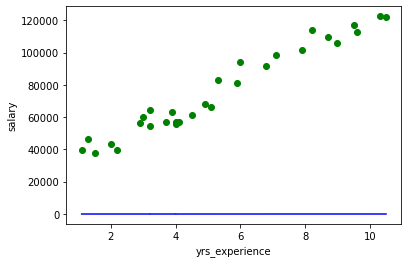

In [44]:
# Visualization of regression
import matplotlib.pylab as plt
plt.scatter(x=data['yrs_experience'],y=data['salary'],color='green');plt.plot(data['yrs_experience'],pred3,color='blue');plt.xlabel('yrs_experience');plt.ylabel('salary')

In [45]:
# getting residuals of the entire data set

data_resid=model3.resid_pearson
data_resid

array([-2.62856286, -2.53520584, -1.21165179, -0.52900213,  0.1783699 ,
       -0.13544939, -0.29980314,  0.46029816, -0.40618444,  0.82040237,
        0.51478963,  1.26232636,  1.16155444,  1.25249551,  1.28665421,
        1.0457908 ,  1.37594637,  0.05621983,  0.64733073, -0.37323186,
        0.33299592, -0.05546522,  0.12175325, -0.80873095, -0.18538208,
        0.28773542, -0.47627671, -0.05762179, -0.61313045, -0.48896426])

Text(0, 0.5, 'Standardized Residual')

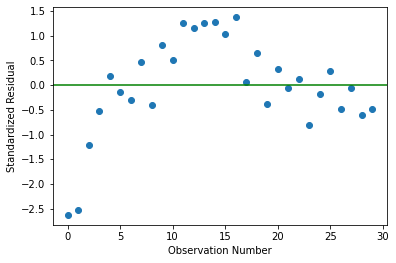

In [46]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

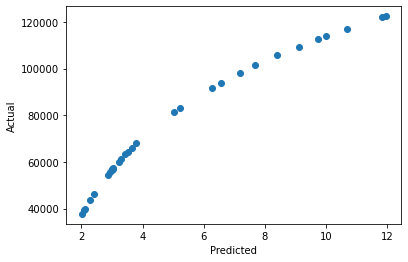

In [47]:
# Predicted vs Actual Values
plt.scatter(x=pred3,y=data.salary);plt.xlabel("Predicted");plt.ylabel("Actual")

In [48]:
# Quadratic Model
salary_sq = data.salary*data.salary


In [50]:
model_quad = smf.ols("yrs_experience~salary+salary_sq",data=data).fit()

In [51]:
## Model Testing
model_quad.params

Intercept   -1.715993e+00
salary       8.254010e-05
salary_sq    1.162596e-10
dtype: float64

In [52]:
## Checking t & p value of Model3
model_quad.tvalues , model_quad.pvalues

(Intercept   -1.463360
 salary       2.592421
 salary_sq    0.593087
 dtype: float64,
 Intercept    0.154914
 salary       0.015198
 salary_sq    0.558059
 dtype: float64)

In [53]:
model3.rsquared , model_quad.rsquared_adj

(0.8538888828756969, 0.9543628231481831)

In [54]:
pred_quad = model_quad.predict(data.salary)

In [55]:
# quad model at 95% confidence interval
model_quad.conf_int(0.05)

,0,1
Intercept,-4.122048e+00,6.900631e-01
salary,1.721187e-05,1.478683e-04
salary_sq,-2.859497e-10,5.184690e-10


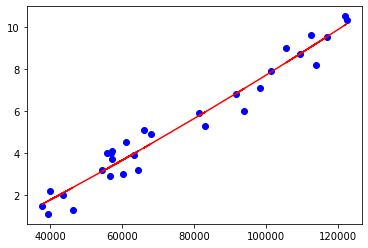

In [56]:
plt.scatter(data.salary,data.yrs_experience,c="b");plt.plot(data.salary,pred_quad,"r")

(array([4., 0., 3., 2., 0., 8., 2., 4., 2., 5.]),
 array([-1.75468173, -1.43751049, -1.12033924, -0.80316799, -0.48599674,
        -0.1688255 ,  0.14834575,  0.465517  ,  0.78268825,  1.0998595 ,
         1.41703074]),
 <BarContainer object of 10 artists>)

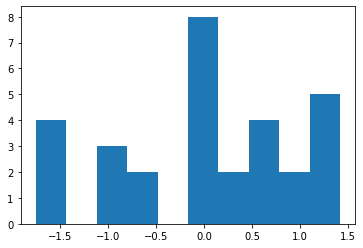

In [57]:
plt.hist(model_quad.resid_pearson)

In [ ]:
###------------------------------------------###